In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']
data = pd.read_csv(url, names=names)


In [3]:
# Replace missing values with NaN
data.replace('?', np.nan, inplace=True)

In [4]:
# Convert columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')


In [5]:
# Drop rows with missing values
data.dropna(inplace=True)
data.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# Split data into features and target
X = data.drop('hd', axis=1)
y = data['hd']
y = y >= 1
print(y)

0      False
1       True
2       True
3      False
4      False
       ...  
297     True
298     True
299     True
300     True
301     True
Name: hd, Length: 297, dtype: bool


In [7]:
# Encoding categorical variables
X_encoded = pd.get_dummies(X, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

In [8]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print(y_train)

277    False
262    False
30     False
22      True
281    False
       ...  
190    False
71      True
107     True
274     True
103    False
Name: hd, Length: 237, dtype: bool


In [9]:
# Building the Decision Tree model
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier()

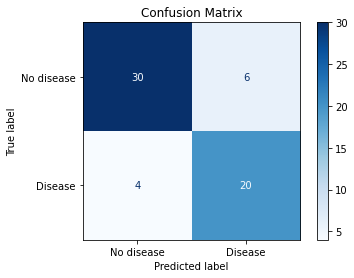

In [10]:
# Importing necessary library
from sklearn.metrics import ConfusionMatrixDisplay

# Predict on the test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No disease","Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

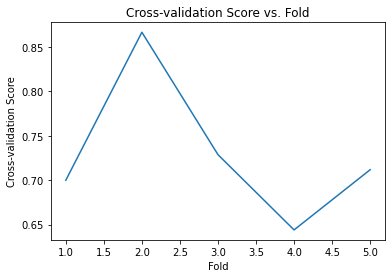

In [11]:
# Finding cross-validation score and plotting it
cv_scores = cross_val_score(clf, X_encoded, y, cv=5)
plt.plot(range(1, 6), cv_scores)
plt.xlabel('Fold')
plt.ylabel('Cross-validation Score')
plt.title('Cross-validation Score vs. Fold')
plt.show()

[Text(198.60066964285716, 207.55636363636364, 'ca <= 0.5\ngini = 0.499\nsamples = 237\nvalue = [124, 113]\nclass = Yes'),
 Text(123.68169642857143, 187.7890909090909, 'thal_7.0 <= 0.5\ngini = 0.384\nsamples = 139\nvalue = [103, 36]\nclass = Yes'),
 Text(75.47946428571429, 168.0218181818182, 'oldpeak <= 2.7\ngini = 0.243\nsamples = 99\nvalue = [85, 14]\nclass = Yes'),
 Text(49.323214285714286, 148.25454545454545, 'age <= 57.5\ngini = 0.192\nsamples = 93\nvalue = [83, 10]\nclass = Yes'),
 Text(23.914285714285715, 128.48727272727274, 'thalach <= 125.5\ngini = 0.062\nsamples = 62\nvalue = [60, 2]\nclass = Yes'),
 Text(11.957142857142857, 108.72, 'thal_3.0 <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Yes'),
 Text(5.978571428571429, 88.95272727272729, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = No'),
 Text(17.935714285714287, 88.95272727272729, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'),
 Text(35.871428571428574, 108.72, 'restbp <= 109.0\ngini = 0.033\nsamples 

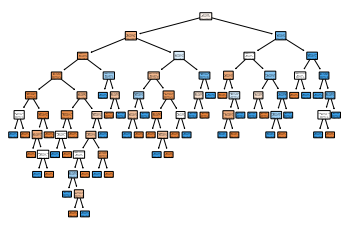

In [17]:

plot_tree(clf,filled=True,rounded=True,class_names=["Yes","No"],feature_names=X_encoded.columns)